# `Data Source`

In [1]:
%%shell

git clone https://github.com/SmartyPants042/NER-Deep-Learning.git
pwd
cd NER-Deep-Learning/Data/
unzip dataset.zip
unzip test_dataset.zip
# downloads the keras_contrib module required for the CRF Layer
pip install git+https://www.github.com/keras-team/keras-contrib.git

Cloning into 'NER-Deep-Learning'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 48 (delta 8), reused 5 (delta 2), pack-reused 26
Unpacking objects: 100% (48/48), done.
/content
Archive:  dataset.zip
  inflating: dataset.csv             
Archive:  test_dataset.zip
  inflating: test_dataset.csv        
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-12h0i_ox
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-12h0i_ox
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=cad6a0e744c09172cd04d6f8af17f90d4a738ecbadeee8a19ed7ef24f3c78626
  Stored in directory: /tmp/pip-ephem-wheel-cache-ekxw66ho/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
data_input = '/content/NER-Deep-Learning/Data/dataset.csv'
test_input = '/content/NER-Deep-Learning/Data/test_dataset.csv'

# `Imports`

In [0]:
# DATA EXPLORATION IMPORTS
# Dataframe manipulations
import pandas as pd
# Array manipulations
import numpy as np
# Plotting and Graphs
import matplotlib.pyplot as plt

# Split the data into train and test data
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
# Final report card
from sklearn.metrics import classification_report
# The base class of all estimators, used for Memory Tagging.
# Gets get_params and set_params
from sklearn.base import BaseEstimator

# DEEP LEARNING IMPORTS
# Library used for optimizers
import keras
# Not all sentences are of same length, padding is required
from keras.preprocessing.sequence import pad_sequences
# Converts the target labels to categories that the neural net can predict
from keras.utils import to_categorical
# Type of model used for DL
from keras.models import Sequential, Model
# Layers present in the network. 
# Refer README.md for more details.
# Analysis of different combinations of layers in README.md
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
# A condtitional Random Field
from keras_contrib.layers import CRF
# For the loss by CRF Layer
from keras_contrib.losses import crf_loss
# For the accuracy given by the CRF Layer. 
# The accuracy otherwise is extremely low
# Causing it to be interpreted in a wrong way
from keras_contrib.metrics import crf_viterbi_accuracy

# GRAPHING PREFERENCES
# Plotting style
plt.style.use("ggplot")
# Magic command
%matplotlib inline

# `Data Exploration`

Data: Twitter data for Fifa 2018 World Cup 

(More)Testing Data: An extract from GMB(Groningen Meaning Bank) corpus. Only the relevant NE tags were kept and are modified to parallel with the twitter data. 

## Input

In [0]:
df = pd.read_csv(data_input)
df_test = pd.read_csv(test_input)

In [6]:
df.tail()

,Serial Number,Sentence ID,Word,POS Tag,NER Tag
6291442,6291443,530000,out,RP,O
6291443,6291444,530000,the,DT,O
6291444,6291445,530000,racism,NN,O
6291445,6291446,530000,and,CC,O
6291446,6291447,530000,xenophobi,NN,O


In [7]:
df_test.tail()

,Sentence ID,Word,POS Tag,NER Tag
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O
1048574,Sentence: 47959,attack,NN,O


## Details For Training Data

In [8]:
df.describe()

,Serial Number,Sentence ID
count,6.291447e+06,6.291447e+06
mean,3.145724e+06,2.606881e+05
std,1.816184e+06,1.510713e+05
min,1.000000e+00,1.000000e+00
25%,1.572862e+06,1.335100e+05
50%,3.145724e+06,2.548480e+05
75%,4.718586e+06,3.882810e+05
max,6.291447e+06,5.300000e+05


In [9]:
print("Number of Sentences: {}".format(len(pd.unique(df["Sentence ID"].values))))
print("Number of Words: {}".format(len(pd.unique(df["Word"].values))))
print("Number of POS Tags: {}".format(len(pd.unique(df["POS Tag"].values))))
print("Number of NE Tags: {}".format(len(pd.unique(df["NER Tag"].values))))
print()
print()
print("List of Tags:")
print(pd.unique(df["POS Tag"].values))
print()
print("List of Entity Tags:")
print(pd.unique(df["NER Tag"].values))

Number of Sentences: 530000
Number of Words: 51867
Number of POS Tags: 37
Number of NE Tags: 5


List of Tags:
['RB' 'CD' 'NNS' 'VBP' 'VBN' 'IN' 'NN' 'NNP' 'VBZ' 'DT' 'VBG' 'TO' 'VB'
 'WRB' 'PRP' 'MD' 'JJ' 'JJR' 'VBD' 'RP' 'CC' 'WP' 'PRP$' 'JJS' 'FW' 'NNPS'
 'UH' 'WDT' 'EX' 'RBS' 'RBR' 'PDT' 'WP$' 'POS' 'LS' 'SYM' "''"]

List of Entity Tags:
['O' 'B-Play' 'B-Team' 'I-Play' 'I-Team']


In [10]:
print("Number of Sentences: {}".format(len(pd.unique(df_test["Sentence ID"].values))))
print("Number of Words: {}".format(len(pd.unique(df_test["Word"].values))))
print("Number of POS Tags: {}".format(len(pd.unique(df_test["POS Tag"].values))))
print("Number of NE Tags: {}".format(len(pd.unique(df_test["NER Tag"].values))))
print()
print()
print("List of Tags:")
print(pd.unique(df_test["POS Tag"].values))
print()
print("List of Entity Tags:")
print(pd.unique(df_test["NER Tag"].values))

Number of Sentences: 47959
Number of Words: 35109
Number of POS Tags: 42
Number of NE Tags: 5


List of Tags:
['NNS' 'IN' 'VBP' 'VBN' 'NNP' 'TO' 'VB' 'DT' 'NN' 'CC' 'JJ' '.' 'VBD' 'WP'
 '``' 'CD' 'PRP' 'VBZ' 'POS' 'VBG' 'RB' ',' 'WRB' 'PRP$' 'MD' 'WDT' 'JJR'
 ':' 'JJS' 'WP$' 'RP' 'PDT' 'NNPS' 'EX' 'RBS' 'LRB' 'RRB' '$' 'RBR' ';'
 'UH' 'FW']

List of Entity Tags:
['O' 'B-Team' 'B-Play' 'I-Team' 'I-Play']


In [11]:
df_test.describe()

,Sentence ID,Word,POS Tag,NER Tag
count,1048575,1048575,1048575,1048575
unique,47959,35109,42,5
top,Sentence: 22480,the,NN,O
freq,104,52573,145807,969276


## Generating Sentences

Forming sentences from word and Sentence ID data

In [0]:
aggregate_function = lambda s: [(w, p, t) for w, p, t in zip(
    list(s['Word'].values),
    list(s['POS Tag'].values),
    list(s['NER Tag'].values)
)]

In [0]:
sentences = df.groupby("Sentence ID").apply(aggregate_function)
sentences_test = df_test.groupby("Sentence ID").apply(aggregate_function)

## Graphs

Shows distributions of twitter and the GMB corpus's length of sentences.  Intrestingly, Even though the maximum character tweet limit was 140 characters, our tweet corpus show a maximum of 62. The GMB corpus extract shows maxmum length of 104 characters.  
Moreover, the GMB extract shows a normal distribution.

In [0]:
max_length = max(len(s) for s in sentences)

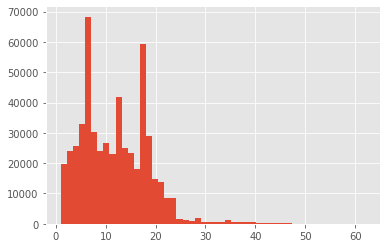

Maximum Length:  62


In [15]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()
print("Maximum Length: ", max_length)

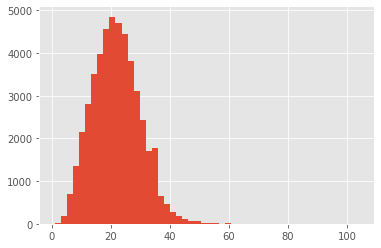

Maximum Length:  104


In [16]:
plt.hist([len(s) for s in sentences_test], bins=50)
plt.show()

max_length_test = max(len(s) for s in sentences_test)
print("Maximum Length: ", max_length_test)

## Preparing Words and Tags for Embeddings

Since not all sentences are of equal length, we will add extra padding 'words' to make the input length same for all of the sentences.  
Eg: "The sky is blue." becomes "The sky is blue. --PAD-- --PAD-- --PAD-- ..."

The Neural Network does not understand words. It only understands Numbers; so, we assign numbers to words arbitarily. We do the same for the NE tags.

In [17]:
words = list(set(df["Word"].values))
words.append("__PAD__")
n_words = len(words)
print(n_words)

51868


In [18]:
words_test = list(set(df_test["Word"].values))
words_test.append("__PAD__")
n_words_test = len(words_test)
print(n_words_test)

35110


In [19]:
tags = list(set(df["NER Tag"].values))
n_tags = len(tags)
print(n_tags)

5


In [0]:
word2id = {w: i for i, w in enumerate(words)}
tag2id = {t: i for i, t in enumerate(tags)}

# `Training & Testing Data`

## Getting Sentences

In [0]:
# Creates vector of sentences, where each sentence is itself a vector of 62 words maximum.
# We have not yet converted the words to thier respective IDs.
# We have not yet made the sentences of the same length aka padding.
X_train_sent = [[tup[0] for i, tup in enumerate(sent) if i<max_length] for sent in sentences]
y_train_sent = [[tup[2] for i, tup in enumerate(sent) if i<max_length] for sent in sentences]

In [0]:
# We do the same for the GMB extact
X_test_sent = [[tup[0] for i, tup in enumerate(sent) if i<max_length] for sent in sentences_test]
y_test_sent = [[tup[2] for i, tup in enumerate(sent) if i<max_length] for sent in sentences_test]

## Generating Encodings

In [0]:
def generate_encodings(X_sent, y_sent):
    """
    Description: Converts the list of sentences containing words to a list of sentences conataining just numbers.
    If the word is present in the vocabulary, it is assigned the correct corresponding id;
    If the word is present in the twitter data, but not in the GMB data,
    we simply assign it the value of '__PAD__'.
    
    Returns: Two tuple of encoded sentences, encoded target labels
    
    Input Params: Two tuple of sentences and target labels.
    """
    X_train = []
    y_train = []
    
    for x_s, y_s in zip(X_sent, y_sent):

        temp_x = []
        temp_y = []

        for x, y in zip(x_s, y_s):
            try:
                x = word2id[x]
            except:
                x = word2id['__PAD__']
            try:
                y = tag2id[y]
            except:
                y = tag2id['O']

            temp_x.append(x)
            temp_y.append(y)

        X_train.append(temp_x)
        y_train.append(temp_y)

    return (X_train, y_train)

In [0]:
X_train, y_train = generate_encodings(X_train_sent, y_train_sent)

In [0]:
X_test, y_test = generate_encodings(X_test_sent, y_test_sent)

## Padding

In [0]:
# We make the sentences and the target labels of each of the same length, 62.
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', value=word2id['__PAD__'])
y_train = pad_sequences(y_train, maxlen=max_length, padding='post', value=tag2id['O'])

In [0]:
# Similarly,
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', value=word2id['__PAD__'])
y_test = pad_sequences(y_test, maxlen=max_length, padding='post', value=tag2id['O'])

## Convert y to categories

Since the target labels in y are categories, we convert them. This is for the loss function, categorical cross entropy.

In [0]:
y_train = [to_categorical(i, n_tags) for i in y_train]

In [0]:
y_test = [to_categorical(i, n_tags) for i in y_test]

# `Memory Tagging`

In [0]:
class MemoryTagger(BaseEstimator):
    def fit(self, X, y):
        """
        Memorizes the most popular tag for the word
        
        Input Parameters:
        X: a list of words
        eg: ["The", "sky", "is", "blue", "."]
        
        y: a lsit of Entity Tags
        eg: ["O", "B-nat", "I-nat", "O"]
        
        Return: None
        """
        
        vocab = {}
        self.tags = []
        for x, t in zip(X, y):
            
            # stores the distinct tags used
            if t not in self.tags:
                self.tags.append(t)
            
            # if x is a word encountered before
            if x in vocab:
                # if tag is seen before
                if t in vocab[x]:
                    vocab[x][t] += 1
                else:
                    vocab[x][t] = 0
            # first time encountering the word
            else:
                vocab[x] = {t: 0}
            
        # Finding the most popular tags for the word
        self.memory = {}
        for key, d in vocab.items():
            self.memory[key] = max(d, key=d.get)
    
    def predict(self, X, y=None):
        """
        Predict the the tag from memory. If the word is unknown, defaults to prediction: 'O'.
        """
        return [self.memory.get(x, 'O') for x in X]

In [0]:
tagger = MemoryTagger()

In [0]:
X_memory_train = list(df["Word"].values)
y_memory_train = list(df["NER Tag"].values)

In [0]:
X_memory_test = list(df_test["Word"].values)
y_memory_test = list(df_test["NER Tag"].values)

In [0]:
tagger.fit(X_memory_train, y_memory_train)

In [0]:
predictions = tagger.predict(X_memory_test)

In [36]:
report = classification_report(y_pred=predictions, y_true=y_memory_test)
print(report)

              precision    recall  f1-score   support

      B-Play       0.16      0.09      0.12     16990
      B-Team       0.53      0.20      0.29     37644
      I-Play       0.34      0.01      0.03     17251
      I-Team       0.41      0.06      0.10      7414
           O       0.94      0.99      0.96    969276

    accuracy                           0.92   1048575
   macro avg       0.47      0.27      0.30   1048575
weighted avg       0.89      0.92      0.90   1048575



# `Deep Learning`

In [0]:
model = Sequential([
                    # Takes the ids of words and returns the associated vectors
                    # the dimensions of the resulting vector is 64
                    Embedding(input_dim=n_words, output_dim=64, input_length=max_length),
                    # The dropout layer takes a random 30% of the nodes
                    # and disconnects it. This prevents overfitting
                    Dropout(0.5),
                    # A bidirectional wrapper over LSTM Layer
                    # This helps capture contexts in both directions
                    Bidirectional(LSTM(
                        # The number of units in LSTM Layer
                        128,
                        # The Activation function can be expiremented with.
                        # Try using 'sigmoid' function or the more famous,
                        # 'relu' functions
                        activation='tanh',
                        # This layer returns the full output.
                        # If not present, just returns the last output 
                        return_sequences=True, 
                        # This can also be experimented with
                        recurrent_activation='sigmoid', 
                        use_bias=True,
                    )),
                    # Another measure to prevent overfitting
                    Dropout(0.5),
                    # keep one-to-one relations on input and output
                    # and lets sequence map indipendently
                    TimeDistributed(Dense(
                        # The number of possible 'buckets' we can put the final
                        # predicted tag into
                        n_tags,
                        # Used to calculate probability distributions,
                        # can not be experimented with without major loss of 
                        # logic and accuracy
                        activation='relu'
                    )),
                    CRF(n_tags)
])

In [0]:
adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

In [0]:
model.compile(
    # Can be experimented by replacing with 'rmsprop' 
    # Both show almost the same result and take almost same training time
    optimizer=adam,
    # The way to measure how accurately the network has predicted the tag
    # from the given n_tags
    loss=crf_loss,
    # We will measure performance on the basis of accuracy
    metrics=['accuracy', crf_viterbi_accuracy])

In [41]:
# Describes the layers in the network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 62, 64)            3319552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 64)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 62, 256)           197632    
_________________________________________________________________
dropout_2 (Dropout)          (None, 62, 256)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 62, 5)             1285      
_________________________________________________________________
crf_1 (CRF)                  (None, 62, 5)             65        
Total params: 3,518,534
Trainable params: 3,518,534
Non-trainable params: 0
____________________________________________

In [42]:
history = model.fit(
    #  The Training data: Features and Labels
    X_train, np.array(y_train),
    #  The number of training examples in one forward/backward pass
    batch_size=256,
    # The number of iterations over the training data
    epochs=2,
    # Shows the details of training
    verbose=1,
    # Shuffles the training data
    # so that each time the network sees a new sequence of batches
    shuffle=True,
    # Splitting the Total Data and validating on 25% of the data
    validation_split=0.40,
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 318000 samples, validate on 212000 samples
Epoch 1/2
318000/318000 [==============================] - 417s 1ms/step - loss: 0.0738 - accuracy: 0.9835 - crf_viterbi_accuracy: 0.9727 - val_loss: 0.0107 - val_accuracy: 0.9962 - val_crf_viterbi_accuracy: 0.9963
Epoch 2/2
318000/318000 [==============================] - 410s 1ms/step - loss: 0.0057 - accuracy: 0.9835 - crf_viterbi_accuracy: 0.9983 - val_loss: 0.0027 - val_accuracy: 0.9993 - val_crf_viterbi_accuracy: 0.9993


In [0]:
hist = pd.DataFrame(history.history)

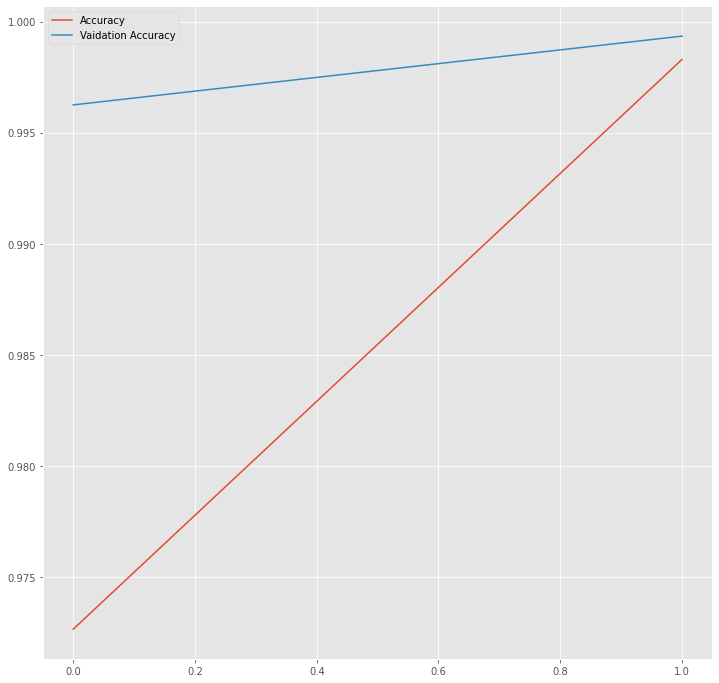

In [50]:
plt.figure(figsize=(12,12))
plt.plot(hist["crf_viterbi_accuracy"],  label='Accuracy')
plt.plot(hist["val_crf_viterbi_accuracy"], label='Vaidation Accuracy')
plt.legend()
plt.show()